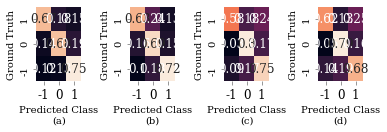

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
SPINE_COLOR = 'gray'
data = pd.read_csv(r'800OE-f1-3class.csv')
data2 = pd.read_csv(r'800OE-f1-3class-senti-140.csv')
data3 = pd.read_csv(r'516ST-f1-3class.csv')
data4 = pd.read_csv(r'516ST-f1-3class-senti-140.csv')

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': [r'\usepackage{gensymb}'],
              'axes.labelsize': 10, # fontsize for x and y labels (was 10)
              'axes.titlesize': 12,
              'font.size': 12, # was 10
              'legend.fontsize': 12, # was 10
              'xtick.labelsize': 12,
              'ytick.labelsize': 10,
              'text.usetex': False,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif',
              'legend.fontsize': 12
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax
latexify(8, 2)

fig, ax = plt.subplots(1,4)

datas = [data, data2, data3, data4]

for i in range(4):
    cnf_matrix = confusion_matrix(datas[i]['ZLabel'], datas[i]['pred'])
    cnf_matrix = np.around(cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis], 2)

    sns.heatmap(cnf_matrix,
                fmt = '',
                annot=True,cbar=False,
                xticklabels=[-1,0,1],
                yticklabels=[1,0,-1],ax=ax[i])
    ax[i].set_xlabel('Predicted Class\n('+chr(i+97)+')')
    ax[i].set_ylabel('Ground Truth')
    # ax[0].set_ylim([0,3])

fig.tight_layout()
format_axes(ax[0])
format_axes(ax[1])
format_axes(ax[2])
format_axes(ax[3])
plt.savefig('Confusion1.pdf')
plt.show()